In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [3]:
df_items = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv")
df_reviews = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv")
df_orders = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv")
df_products = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv")
df_geolocation = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_geolocation_dataset.csv")
df_sellers = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_sellers_dataset.csv")
df_payments = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_payments_dataset.csv")
df_customers = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv")
df_category = pd.read_csv("/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv")

Merging Dataframes for further Analysis

In [4]:
df = df_orders.merge(df_items, on='order_id', how='inner')
df = df.merge(df_payments, on='order_id', how='inner', validate='m:m')
df = df.merge(df_reviews, on='order_id', how='inner')
df = df.merge(df_products, on='product_id', how='inner')
df = df.merge(df_customers, on='customer_id', how='inner')
df = df.merge(df_sellers, on='seller_id', how='inner')

In [5]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,19.0,8.0,13.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,9350,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,19.0,13.0,19.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,31570,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,24.0,19.0,21.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,14840,guariba,SP


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117329 entries, 0 to 117328
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       117329 non-null  object 
 1   customer_id                    117329 non-null  object 
 2   order_status                   117329 non-null  object 
 3   order_purchase_timestamp       117329 non-null  object 
 4   order_approved_at              117314 non-null  object 
 5   order_delivered_carrier_date   116094 non-null  object 
 6   order_delivered_customer_date  114858 non-null  object 
 7   order_estimated_delivery_date  117329 non-null  object 
 8   order_item_id                  117329 non-null  int64  
 9   product_id                     117329 non-null  object 
 10  seller_id                      117329 non-null  object 
 11  shipping_limit_date            117329 non-null  object 
 12  price                         

In [7]:
df.isna().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    15
order_delivered_carrier_date       1235
order_delivered_customer_date      2471
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             103437
review_comment_message            67650
review_creation_date                  0
review_answer_timestamp               0
product_category_name              1695


In [8]:
df.rename(columns={'product_name_lenght': 'product_name_length'}, inplace=True)

In [9]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

df['day_of_week_int'] = df['order_purchase_timestamp'].dt.weekday + 1  
df['hour'] = df['order_purchase_timestamp'].dt.hour                    
df['month'] = df['order_purchase_timestamp'].dt.month                 
df['year'] = df['order_purchase_timestamp'].dt.year                    
df['date'] = df['order_purchase_timestamp'].dt.to_period('M')         

# Calculate delivery time in days
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

In [15]:
date_cols = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 
             'order_delivered_customer_date', 'order_estimated_delivery_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col])

In [59]:
columns_to_drop = [
    'order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 
    'payment_sequential', 'payment_installments', 'review_comment_title', 
    'review_creation_date', 'review_answer_timestamp', 'seller_zip_code_prefix', 'review_id', 'customer_id'
]

In [12]:
df.drop(columns_to_drop,axis=1,inplace=True)

In [18]:
# Top states by number of orders
customer_orders = df.groupby('customer_state')['order_id'].count().reset_index()
customer_orders = customer_orders.sort_values(by='order_id', ascending=False)

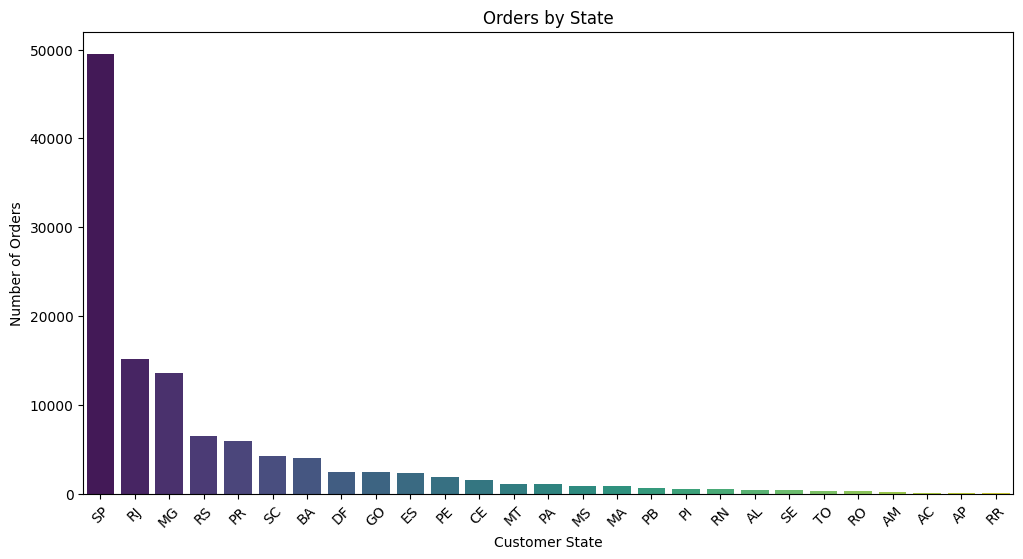

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x=customer_orders['customer_state'], y=customer_orders['order_id'], palette='viridis')
plt.xlabel("Customer State")
plt.ylabel("Number of Orders")
plt.title("Orders by State")
plt.xticks(rotation=45)
plt.show()

In [48]:
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim

In [50]:
sample_geo_data = df_geolocation.sample(frac=0.05)

# Fetch the coordinates
coords = sample_geo_data[['geolocation_lat', 'geolocation_lng']].values.tolist()

# Create a map centered on Brazil
m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# Add the heatmap layer
HeatMap(coords, radius=10).add_to(m)

# Display the map
m


Unique Customers: 94720


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


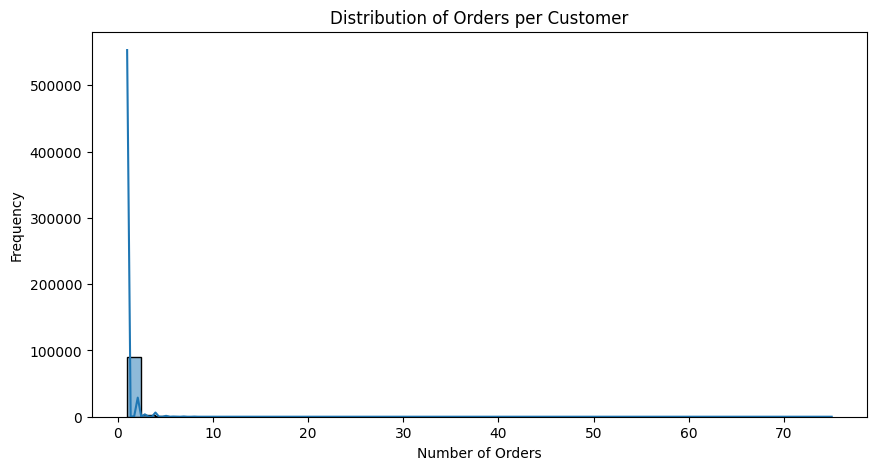

In [21]:
print("\nUnique Customers:", df['customer_unique_id'].nunique())
customer_order_counts = df.groupby('customer_unique_id')['order_id'].count()
plt.figure(figsize=(10, 5))
sns.histplot(customer_order_counts, bins=50, kde=True)
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

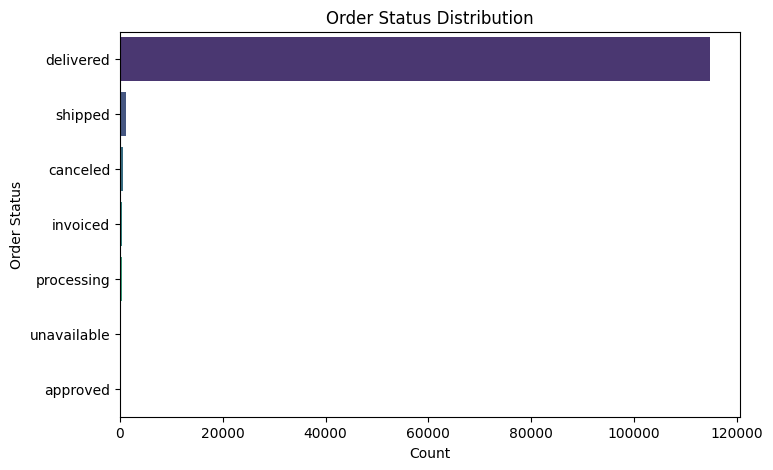

In [22]:
# --- Order Status Distribution ---
plt.figure(figsize=(8, 5))
sns.countplot(y=df['order_status'], order=df['order_status'].value_counts().index, palette='viridis')
plt.title("Order Status Distribution")
plt.xlabel("Count")
plt.ylabel("Order Status")
plt.show()

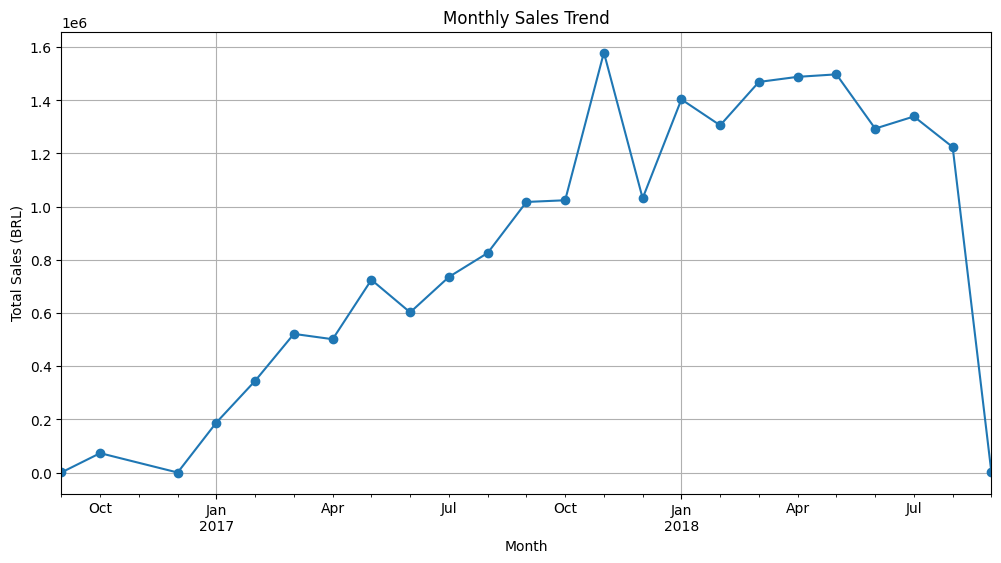

In [23]:
# --- Sales Analysis ---
df['order_purchase_month'] = df['order_purchase_timestamp'].dt.to_period("M")
sales_trend = df.groupby('order_purchase_month')['payment_value'].sum()
plt.figure(figsize=(12, 6))
sales_trend.plot(marker='o', linestyle='-')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (BRL)")
plt.grid()
plt.show()

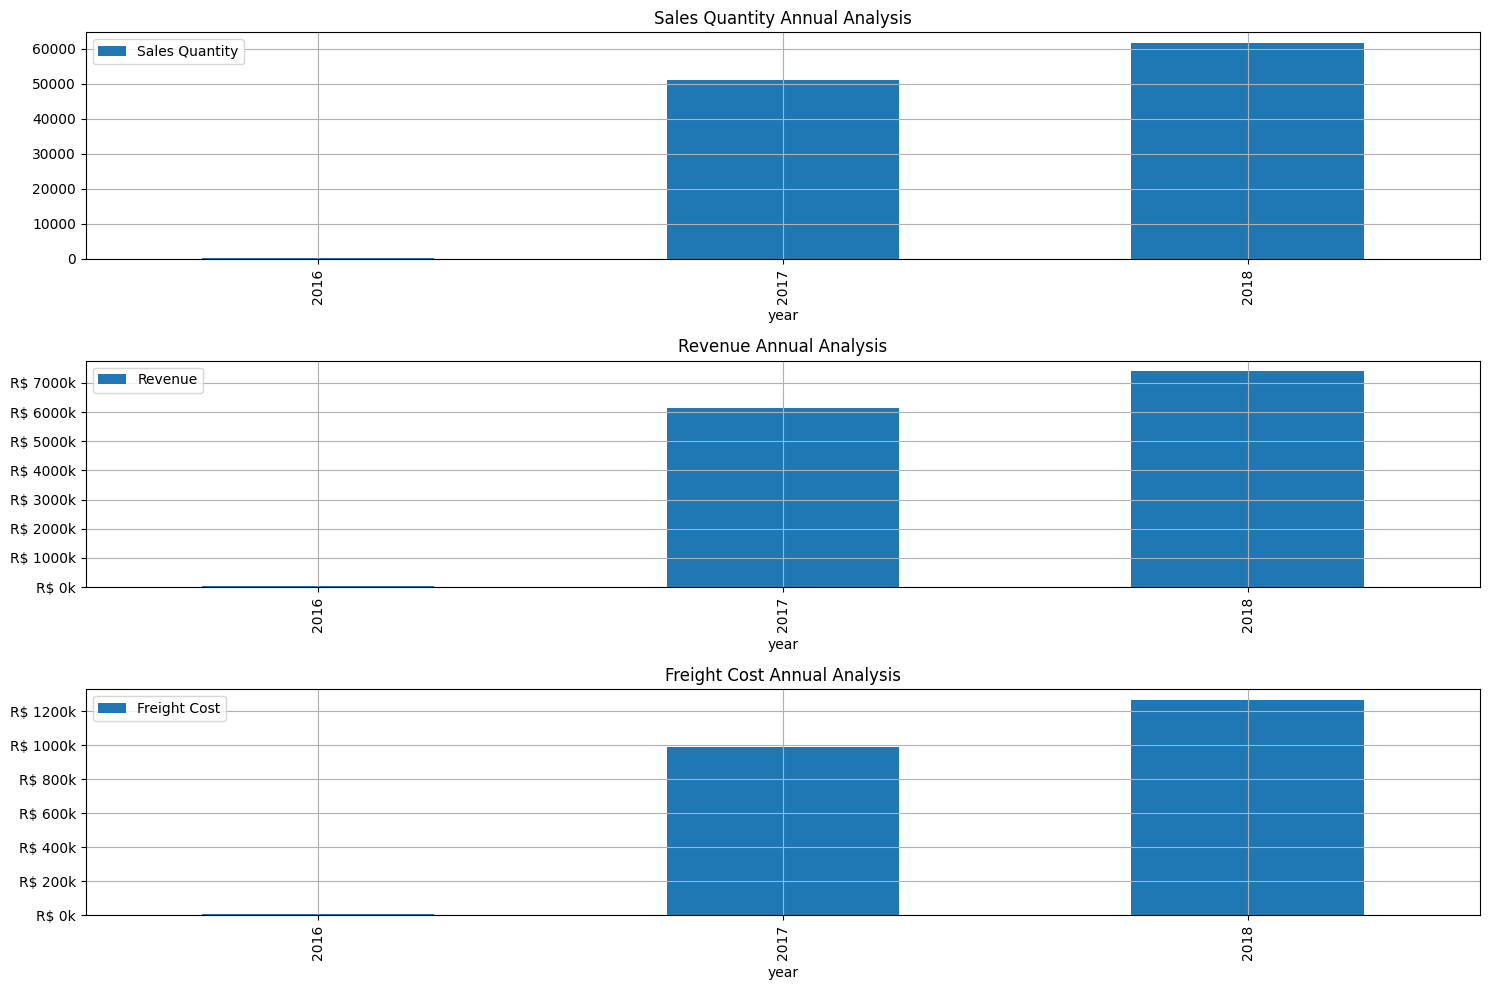

In [63]:
df.rename(columns={'order_id': 'Sales Quantity','price': 'Revenue', 'freight_value': 'Freight Cost'}, inplace=True)

# Grouping by year
annual_data = df.groupby('year').agg({
    'Sales Quantity': 'count',
    'Revenue': 'sum',
    'Freight Cost': 'sum'
}).reset_index()


# Plotting
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
annual_data.plot(x='year', y='Sales Quantity', kind='bar', ax=axes[0], title='Sales Quantity Annual Analysis', grid = True)
annual_data.plot(x='year', y='Revenue', kind='bar', ax=axes[1], title='Revenue Annual Analysis', grid =True)
annual_data.plot(x='year', y='Freight Cost', kind='bar', ax=axes[2], title='Freight Cost Annual Analysis', grid = True)

# Adjusting the y-axis labels
axes[1].yaxis.set_major_formatter(lambda x, _: f'R$ {x*1e-3:.0f}k')
axes[2].yaxis.set_major_formatter(lambda x, _: f'R$ {x*1e-3:.0f}k')

plt.tight_layout()
plt.show()

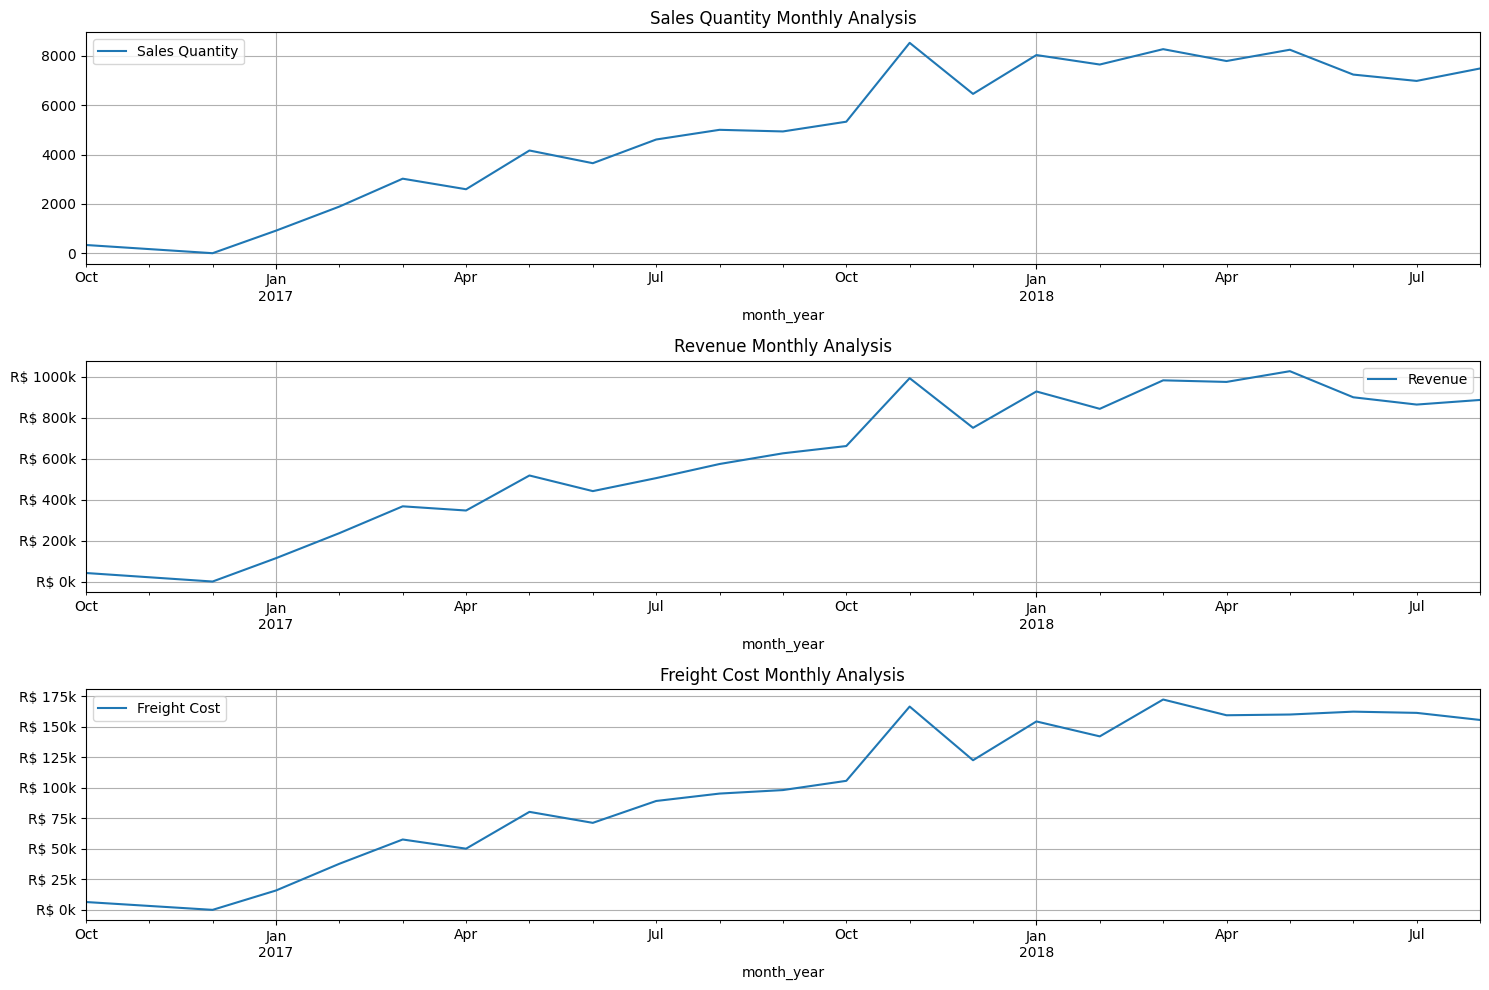

In [67]:
df.rename(columns={'order_id': 'Sales Quantity','price': 'Revenue', 'freight_value': 'Freight Cost'}, inplace=True)
df['month_year'] = df['order_approved_at'].dt.to_period('M')
# Group by month_year to get sales, revenue, and freight cost
monthly_data = df.groupby('month_year').agg({
    'Sales Quantity': 'count',
    'Revenue': 'sum',
    'Freight Cost': 'sum'
}).reset_index()

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
monthly_data.plot(x='month_year', y='Sales Quantity', ax=axes[0], title='Sales Quantity Monthly Analysis', grid=True)
monthly_data.plot(x='month_year', y='Revenue', ax=axes[1], title='Revenue Monthly Analysis', grid=True)
monthly_data.plot(x='month_year', y='Freight Cost', ax=axes[2], title='Freight Cost Monthly Analysis', grid=True)

# Adjust the y-axis labels
axes[1].yaxis.set_major_formatter(lambda x, _: f'R$ {x*1e-3:.0f}k')
axes[2].yaxis.set_major_formatter(lambda x, _: f'R$ {x*1e-3:.0f}k')

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Sales by Period of the Day'}, xlabel='period'>

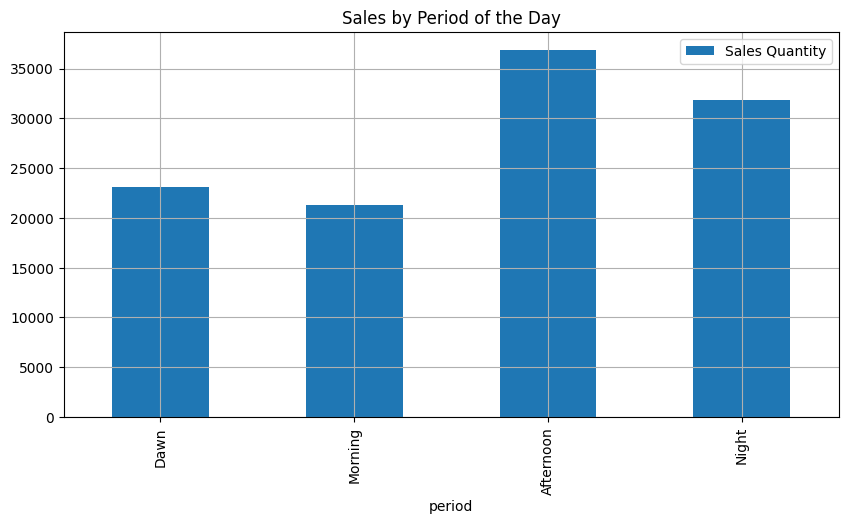

In [68]:
# Determine period of the day
def period_of_day(hour):
    if 0 <= hour < 6:
        return 'Dawn'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'

df['period'] = df['order_approved_at'].dt.hour.apply(period_of_day)

# Group by period of the day
period_data = df.groupby('period').agg({
    'Sales Quantity': 'count'
}).reindex(['Dawn', 'Morning', 'Afternoon', 'Night']).reset_index()

# Plotting
period_data.plot(x='period', y='Sales Quantity', kind='bar', figsize=(10, 5), title='Sales by Period of the Day', grid = True)

In [77]:
# Load datasets
customers_df = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')
order_items_df = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
orders_df = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')

# Ensure the 'order_approved_at' column is a datetime object
orders_df['order_approved_at'] = pd.to_datetime(orders_df['order_approved_at'])

# Merging the datasets
merged_df = pd.merge(orders_df, order_items_df, on='order_id', how='left')
merged_df = pd.merge(merged_df, customers_df, on='customer_id', how='left')

# Convert order_approved_at to datetime format
merged_df['order_approved_at'] = pd.to_datetime(merged_df['order_approved_at'])

# Get the most recent date in the dataset + 1 day (to use as a reference)
last_date = merged_df['order_approved_at'].max() + pd.Timedelta(days=1)

# Calculate Recency
recency_df = merged_df.groupby('customer_unique_id').agg(last_purchase=('order_approved_at', 'max'))
recency_df['Recency'] = (last_date - recency_df['last_purchase']).dt.days

# Calculate Frequency
frequency_df = merged_df.groupby('customer_unique_id').agg(Frequency=('order_id', 'nunique'))

# Calculate Monetary value
monetary_df = merged_df.groupby('customer_unique_id').agg(Monetary=('price', 'sum'))

# Merge all dataframes together
rfm_df = pd.concat([recency_df, frequency_df, monetary_df], axis=1)

# Drop the last_purchase column as it was an intermediate step to get Recency
rfm_df.drop(columns='last_purchase', inplace=True)

In [78]:
# Define the 'now' point as one day after the latest order in the dataset
now = merged_df['order_approved_at'].max() + pd.Timedelta(days=1)

# Recency: Days since last purchase
recency = merged_df.groupby('customer_unique_id')['order_approved_at'].max().reset_index()
recency.columns = ['customer_unique_id', 'LastPurchaseDate']
recency['Recency'] = (now - recency['LastPurchaseDate']).dt.days

# Frequency: Number of purchases
frequency = merged_df.groupby('customer_unique_id')['order_id'].count().reset_index()
frequency.columns = ['customer_unique_id', 'Frequency']

# Monetary: Total money spent
monetary = merged_df.groupby('customer_unique_id')['price'].sum().reset_index()
monetary.columns = ['customer_unique_id', 'Monetary']

# Merge recency, frequency and monetary dataframes
rfm = pd.merge(recency, frequency, on='customer_unique_id')
rfm = pd.merge(rfm, monetary, on='customer_unique_id')

# Display the top rows
print(rfm.head())
print(rfm.describe())

                 customer_unique_id    LastPurchaseDate  Recency  Frequency  \
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 11:11:18    117.0          1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 18:25:44    119.0          1   
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:03    542.0          1   
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:49:17    326.0          1   
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 20:06:52    293.0          1   

   Monetary  
0    129.90  
1     18.90  
2     69.00  
3     25.99  
4    180.00  
                    LastPurchaseDate       Recency     Frequency      Monetary
count                          95997  95997.000000  96096.000000  96096.000000
mean   2018-01-03 00:02:46.369084416    244.250904      1.180330    141.438184
min              2016-09-15 12:16:38      1.000000      1.000000      0.000000
25%              2017-09-15 15:35:13    120.000000      1.000000     45.990000
50%              2018-01-22 14:22:55    225.00

In [79]:
#Churn rate
one_time_buyers = rfm[rfm['Frequency'] == 1].shape[0]

# Total customers
total_customers = rfm.shape[0]

# Calculate churn rate
churn_rate = (one_time_buyers / total_customers) * 100

print(f"The Churn Rate is: {churn_rate:.2f}%")

The Churn Rate is: 87.57%


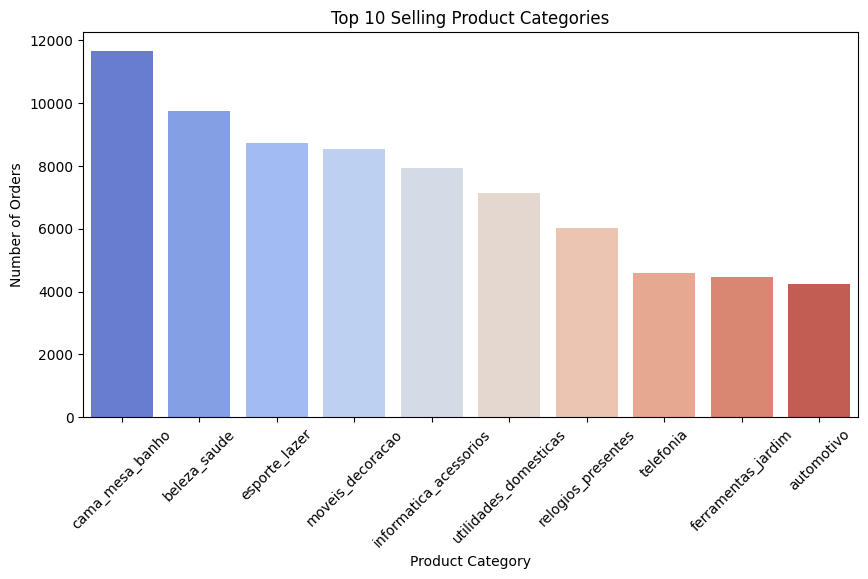

In [31]:
# Top-selling product categories
product_sales = df['product_category_name'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=product_sales.index, y=product_sales.values, palette='coolwarm')
plt.xlabel("Product Category")
plt.ylabel("Number of Orders")
plt.title("Top 10 Selling Product Categories")
plt.xticks(rotation=45)
plt.show()

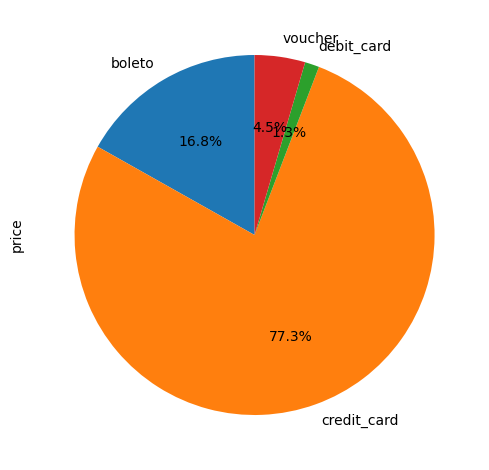

In [42]:
sales_by_payment = df.groupby('payment_type')['price'].sum()
sales_by_payment.plot(kind='pie', autopct='%1.1f%%', startangle=90)

plt.tight_layout()
plt.show()

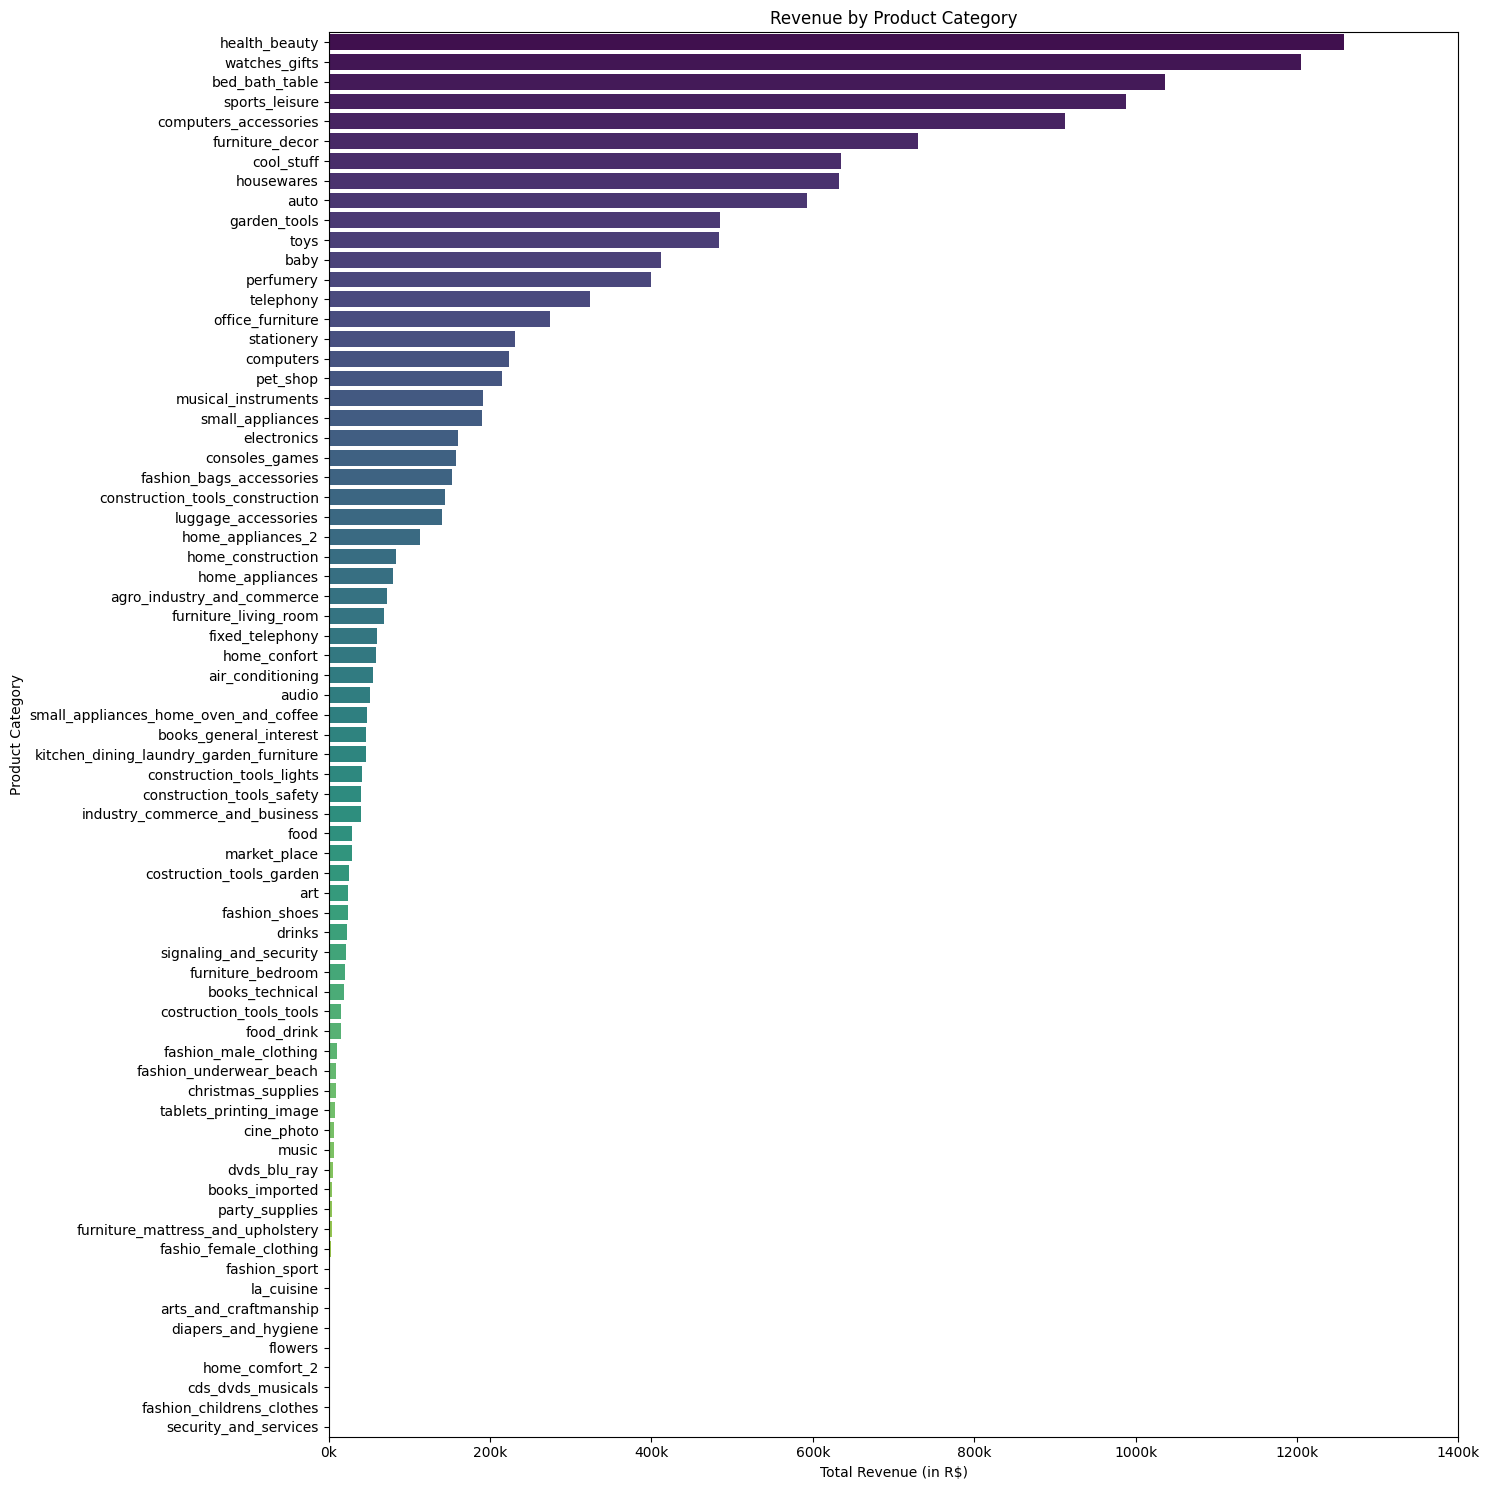

In [56]:
products_df = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv")
translations_df = pd.read_csv("/kaggle/input/brazilian-ecommerce/product_category_name_translation.csv")
order_items_df = pd.read_csv("/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv")

# Merge datasets
merged_products = pd.merge(order_items_df, products_df, on="product_id", how="left")
merged_products = pd.merge(merged_products, translations_df, on="product_category_name", how="left")

# Group by product category (in English) and sum the prices
revenue_by_category = merged_products.groupby("product_category_name_english")["price"].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(15, 15))
sns.barplot(y=revenue_by_category.index, x=revenue_by_category.values, palette="viridis")
plt.title('Revenue by Product Category')
plt.xlabel('Total Revenue (in R$)')
plt.ylabel('Product Category')

# Adjust x-tick labels
ticks = plt.xticks()[0]
labels = [f"{int(tick/1000)}k" for tick in ticks]
plt.xticks(ticks, labels)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


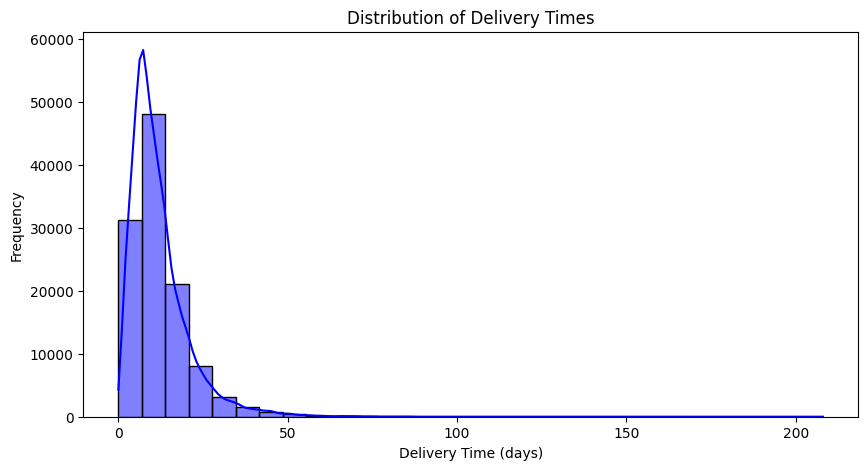

In [24]:
# --- Delivery Time Analysis ---
df['delivery_time_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df = df.dropna(subset=['delivery_time_days'])
plt.figure(figsize=(10, 5))
sns.histplot(df['delivery_time_days'], bins=30, kde=True, color='blue')
plt.title("Distribution of Delivery Times")
plt.xlabel("Delivery Time (days)")
plt.ylabel("Frequency")
plt.show()

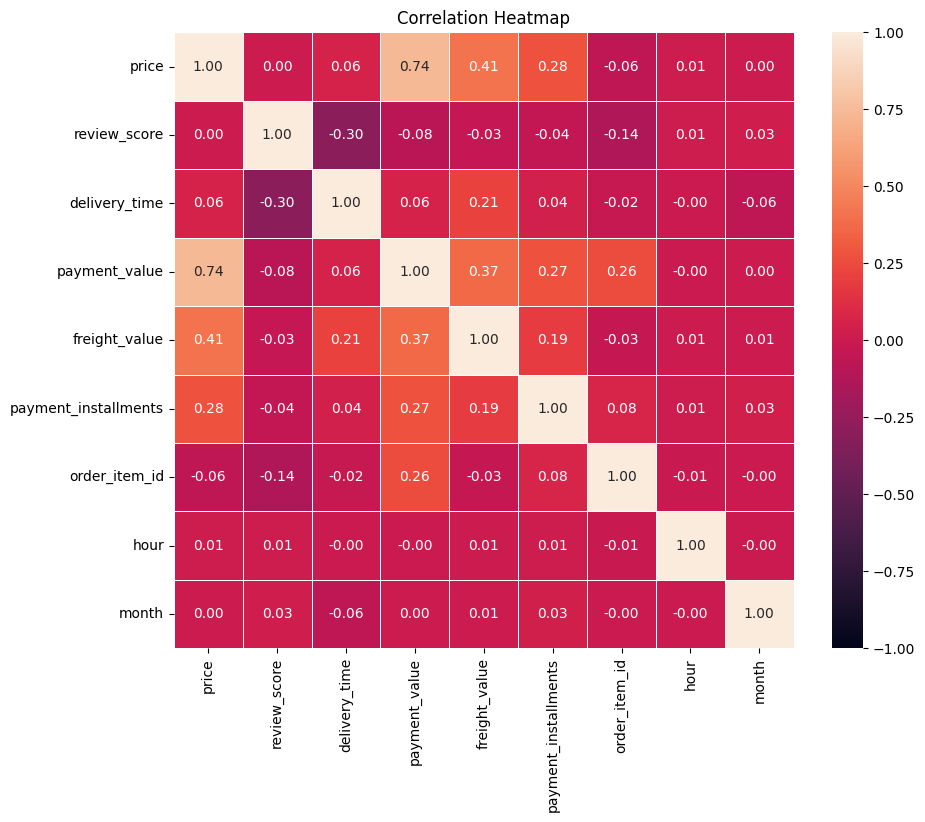

In [43]:
correlation_features = df[['price', 'review_score', 'delivery_time', 
                            'payment_value', 'freight_value', 
                            'payment_installments', 'order_item_id', 
                            'hour', 'month']]

correlation = correlation_features.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [53]:
# Shipment Analysis

# Sample the merged data for the sake of visualization
sample_merged = df.sample(500)

# Create a new map centered on Brazil
m = folium.Map(location=[-14.2350, -51.9253], zoom_start=4)

# For each row in our sample data, draw a line from the seller to the customer
for index, row in sample_merged.iterrows():
    # Fetch seller coordinates
    seller_coords = df_geolocation[df_geolocation['geolocation_city'] == row['seller_city']][['geolocation_lat', 'geolocation_lng']].mean().values.tolist()
    # Fetch customer coordinates
    customer_coords = df_geolocation[df_geolocation['geolocation_city'] == row['customer_city']][['geolocation_lat', 'geolocation_lng']].mean().values.tolist()
    
    # Check if both seller and customer coordinates are valid (not NaN)
    if not any(pd.isna(seller_coords)) and not any(pd.isna(customer_coords)):
        # Create a line connecting seller and customer
        folium.PolyLine([seller_coords, customer_coords], color="Red", weight=0.5, opacity=0.5).add_to(m)

# Display the map
m

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


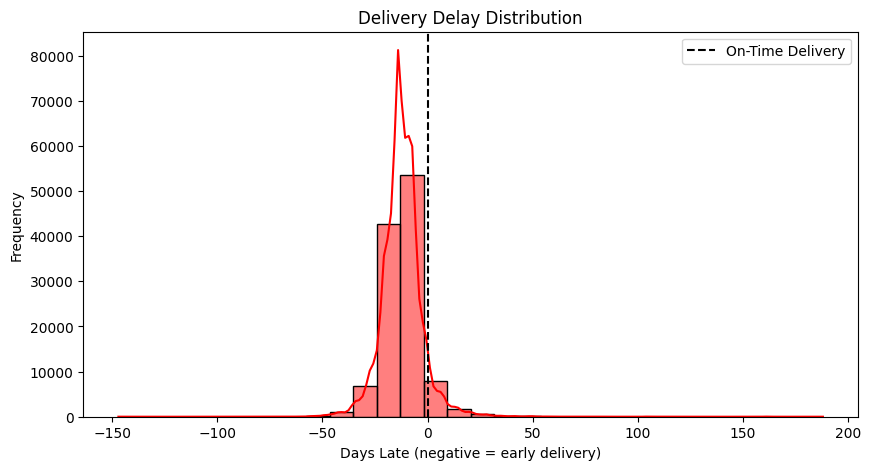

In [25]:
# --- Estimated vs Actual Delivery Time ---
df['delivery_delay'] = (df['order_delivered_customer_date'] - df['order_estimated_delivery_date']).dt.days
plt.figure(figsize=(10, 5))
sns.histplot(df['delivery_delay'], bins=30, kde=True, color='red')
plt.axvline(0, color='black', linestyle='--', label='On-Time Delivery')
plt.title("Delivery Delay Distribution")
plt.xlabel("Days Late (negative = early delivery)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


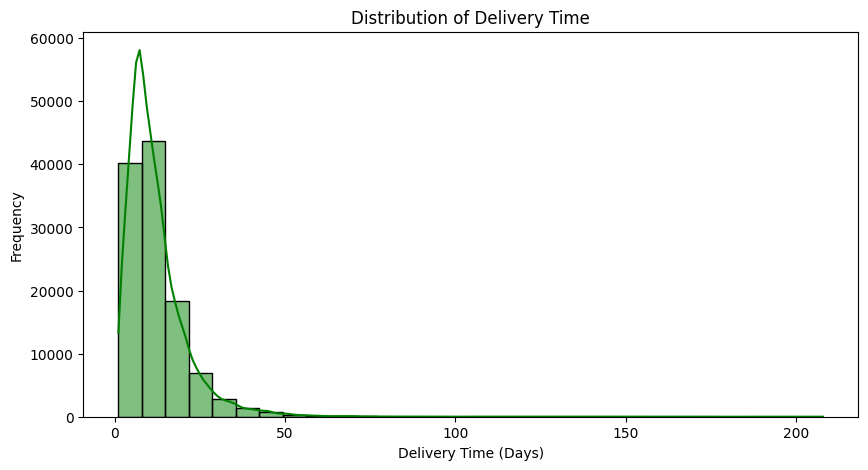

In [30]:
# Delivery time analysis
df['delivery_time'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df = df[df['delivery_time'] > 0]  # Remove invalid values

plt.figure(figsize=(10, 5))
sns.histplot(df['delivery_time'], bins=30, kde=True, color='g')
plt.xlabel("Delivery Time (Days)")
plt.ylabel("Frequency")
plt.title("Distribution of Delivery Time")
plt.show()

In [44]:
# Count the occurrences of each product category
category_counts = df['product_category_name'].value_counts()

# Set a threshold to decide which categories to keep
threshold = 3000  
common_categories = category_counts[category_counts >= threshold].index

# Create a new column for simplified categories
df['simplified_category'] = df['product_category_name'].where(df['product_category_name'].isin(common_categories), 'Other')

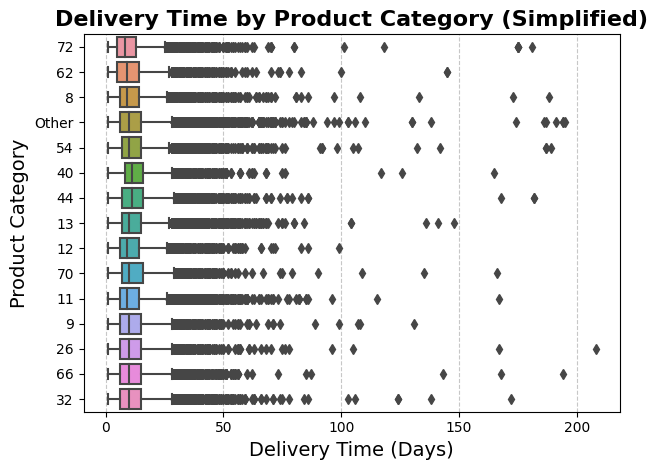

In [46]:
# Horizontal box plot for delivery time by simplified product category
sns.boxplot(x='delivery_time', y='simplified_category', data=df)

# Overlay swarm plot to show individual points
#sns.swarmplot(x='delivery_time', y='simplified_category', data=df, color='k', alpha=0.6, size=3)

# Adding titles and labels
plt.title('Delivery Time by Product Category (Simplified)', fontsize=16, fontweight='bold')
plt.xlabel('Delivery Time (Days)', fontsize=14)
plt.ylabel('Product Category', fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


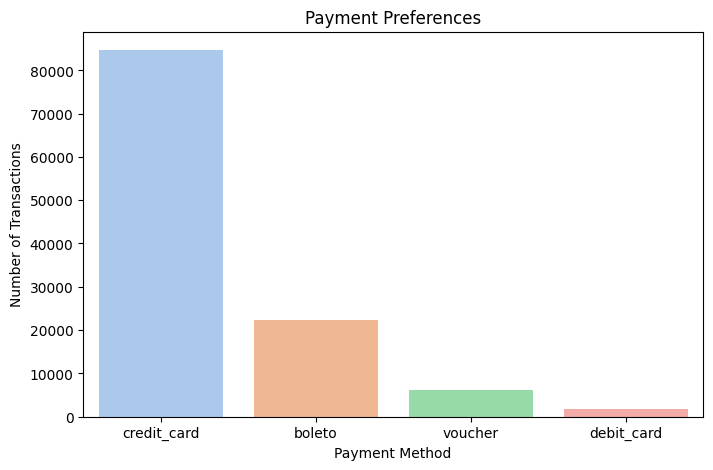

In [29]:
# PAYMENT PREFERENCES
payment_counts = df['payment_type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_counts.index, y=payment_counts.values, palette='pastel')
plt.xlabel("Payment Method")
plt.ylabel("Number of Transactions")
plt.title("Payment Preferences")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


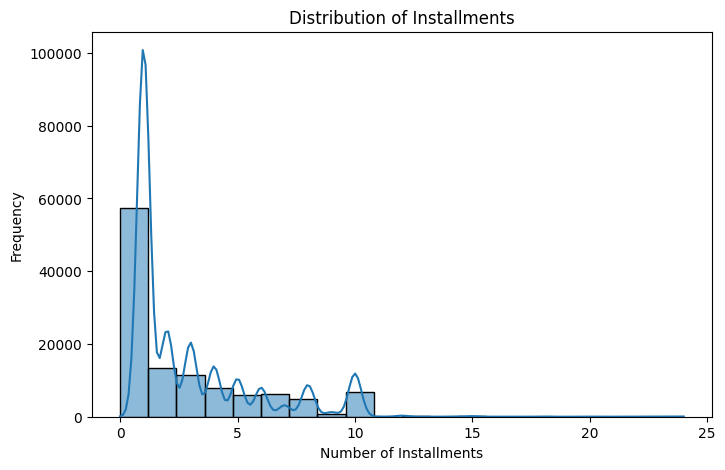

In [32]:
# Installments distribution
plt.figure(figsize=(8, 5))
sns.histplot(df["payment_installments"], bins=20, kde=True)
plt.title("Distribution of Installments")
plt.xlabel("Number of Installments")
plt.ylabel("Frequency")
plt.show()

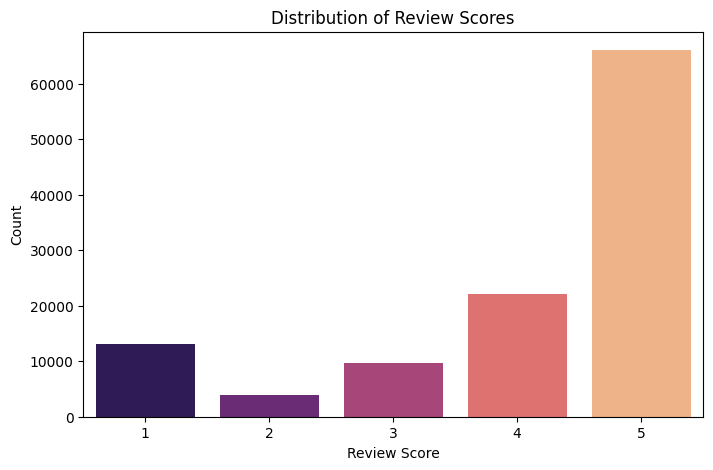

In [28]:
# CUSTOMER REVIEW ANALYSIS
review_scores = df['review_score'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
sns.barplot(x=review_scores.index, y=review_scores.values, palette='magma')
plt.xlabel("Review Score")
plt.ylabel("Count")
plt.title("Distribution of Review Scores")
plt.show()

In [34]:
df["delayed"] = df["order_delivered_customer_date"] > df["order_estimated_delivery_date"]
delayed_percentage = df["delayed"].mean() * 100

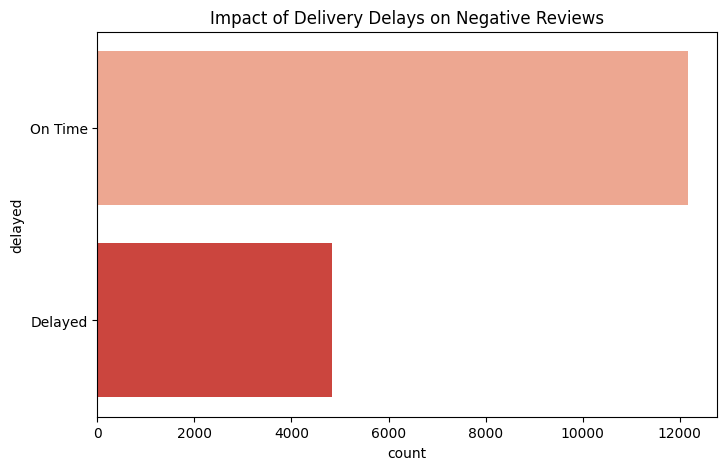

In [35]:
# Negative review analysis
negative_reviews = df[df["review_score"] <= 2]
plt.figure(figsize=(8, 5))
sns.countplot(y=negative_reviews["delayed"].map({True: "Delayed", False: "On Time"}), palette="Reds")
plt.title("Impact of Delivery Delays on Negative Reviews")
plt.show()

In [58]:
# Load datasets
orders_data = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
reviews_data = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_reviews_dataset.csv')

# Merge the datasets
merged_data = pd.merge(orders_data, reviews_data, on='order_id', how='inner')

# Filter orders with status 'delivered'
delivered_orders = orders_data[orders_data['order_status'] == 'delivered'].copy()

# Convert date columns to datetime format
delivered_orders['order_approved_at'] = pd.to_datetime(delivered_orders['order_approved_at'])
delivered_orders['order_delivered_customer_date'] = pd.to_datetime(delivered_orders['order_delivered_customer_date'])

# Calculate the delivery duration in days
delivered_orders['delivery_duration'] = (delivered_orders['order_delivered_customer_date'] - delivered_orders['order_approved_at']).dt.days

# Assuming you've read the olist_order_reviews_dataset.csv into a DataFrame named reviews
merged_data = delivered_orders.merge(reviews_data[['order_id', 'review_score']], on='order_id', how='inner')

# Compute correlation
correlation = merged_data['delivery_duration'].corr(merged_data['review_score'])

print(f"Correlation between delivery time and customer reviews: {correlation:.2f}")

Correlation between delivery time and customer reviews: -0.33


In [26]:
# --- Predictive Analysis: Delivery Time vs Features ---
import statsmodels.api as sm

features = ['freight_value', 'price', 'payment_value']
X = df[features]
y = df['delivery_time_days']
X = sm.add_constant(X)
model = sm.OLS(y, X, missing='drop').fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:     delivery_time_days   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     1863.
Date:                Sun, 16 Feb 2025   Prob (F-statistic):               0.00
Time:                        12:59:22   Log-Likelihood:            -4.1726e+05
No. Observations:              114858   AIC:                         8.345e+05
Df Residuals:                  114854   BIC:                         8.346e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.4768      0.044    215.424

In [27]:
# PREDICTIVE MODELING - Delivery Time Prediction
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Selecting relevant features for prediction
features = ['freight_value', 'product_category_name', 'seller_state', 'customer_state']
df = df.dropna(subset=['delivery_time'])

# One-hot encoding categorical variables
df_encoded = pd.get_dummies(df[features], drop_first=True)
X = df_encoded
y = df['delivery_time']

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f} days")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error: 4.96 days
R² Score: 0.20


In [37]:
# Calculate delivery time
df["actual_delivery_time"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days


In [40]:
### 4. Predictive Modeling: Estimating Delivery Time ###
# Selecting features for modeling
features = ["order_purchase_timestamp", "seller_state", "product_category_name", "freight_value"]
df = df.dropna(subset=features + ["actual_delivery_time"])

# Encoding categorical variables
encoder = LabelEncoder()
df["seller_state"] = encoder.fit_transform(df["seller_state"])
df["product_category_name"] = df["product_category_name"].fillna("Unknown")
df["product_category_name"] = encoder.fit_transform(df["product_category_name"])
df["order_purchase_hour"] = df["order_purchase_timestamp"].dt.hour
df.drop(columns=["order_purchase_timestamp"], inplace=True)

# Prepare train-test split
X = df[["seller_state", "product_category_name", "freight_value", "order_purchase_hour"]]
y = df["actual_delivery_time"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error of Delivery Time Prediction: {mae:.2f} days")


Mean Absolute Error of Delivery Time Prediction: 5.18 days
